# Chest X-Ray Dataset EDA

In [3]:
%load_ext autoreload
%autoreload 2

#imports
from collections import Counter
import random
import seaborn as sns
import torch
from torch.utils.data import Dataset, Subset
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

from src.data_loader import load_data, PneumoniaDataset, split_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
load_data('data')

100%|██████████| 2.29G/2.29G [03:30<00:00, 11.7MB/s]

Extracting files...


In [6]:
trainval_dataset = PneumoniaDataset('data/trainval')
train_dataset, val_dataset = split_dataset(trainval_dataset)

In [7]:
def visualize_dataset(
    dataset: Dataset, sample_size: int = 9
    ) -> None:
    '''
    Visualizes a random sample of images from a PyTorch dataset.

    Parameters:
        dataset (Dataset): A PyTorch dataset object that returns (image, label) tuples.
        sample_size (int, optional): Number of images to sample and display. Defaults to 9.

    Returns:
        None: Displays a matplotlib figure with sampled images and their class labels.
    '''
    indices = random.sample(range(len(dataset)), min(sample_size, len(dataset)))

    base_dataset = dataset
    while isinstance(base_dataset, Subset):
        base_dataset = base_dataset.dataset

    cols = 3
    rows = (len(indices) + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(7, 3 * rows))
    axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        img, label = dataset[idx]

        # Convert tensor to PIL image if needed
        if isinstance(img, torch.Tensor):
            img = to_pil_image(img)

        
        class_name = list(base_dataset.label_map.keys())[label]
        
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(class_name)
        axes[i].axis('off')
        
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    fig.suptitle("Random Sample from the dataset")
    plt.tight_layout()
    plt.show()

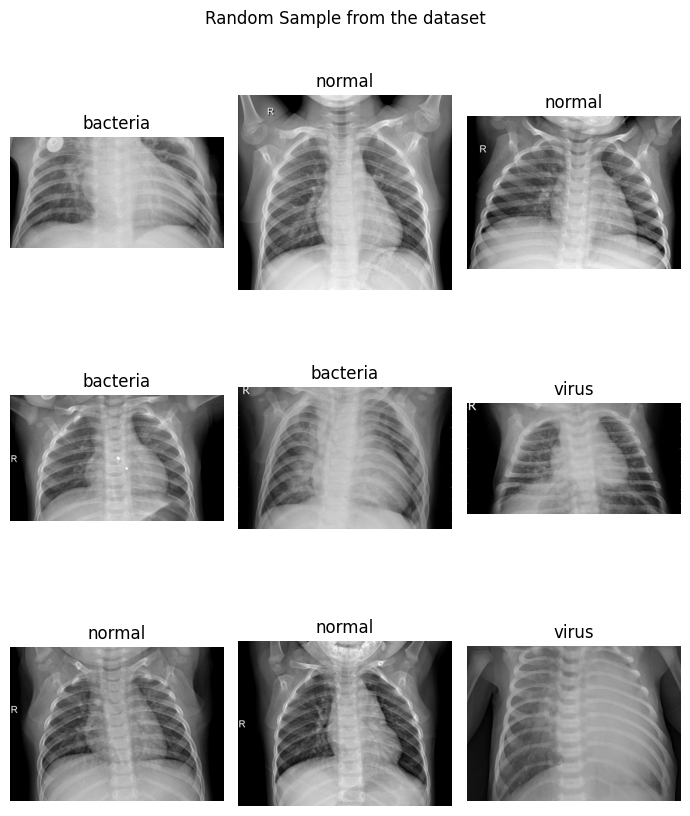

In [8]:
visualize_dataset(train_dataset, 9)

In [18]:
def eda(dataset):
    widths = []
    heights = []
    class_labels = []

    base_dataset = dataset
    while isinstance(base_dataset, Subset):
        base_dataset = base_dataset.dataset

    for img, label in base_dataset:
        # Get image size
        width, height = img.size
        widths.append(width)
        heights.append(height)
        class_name = list(base_dataset.label_map.keys())[label]
        class_labels.append(class_name)
    
    # Plot KDE plots for widths and heights
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.kdeplot(widths, label='Width', fill=True)
    sns.kdeplot(heights, label='Height', fill=True)
    plt.title('KDE Plot of Image Resolutions')
    plt.xlabel('Pixels')
    plt.ylabel('Density')
    plt.legend()

    # Plot class distribution
    plt.subplot(1, 2, 2)
    label_counts = Counter(class_labels)
    classes = list(label_counts.keys())
    counts = list(label_counts.values())
    sns.barplot(x=classes, y=counts)
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

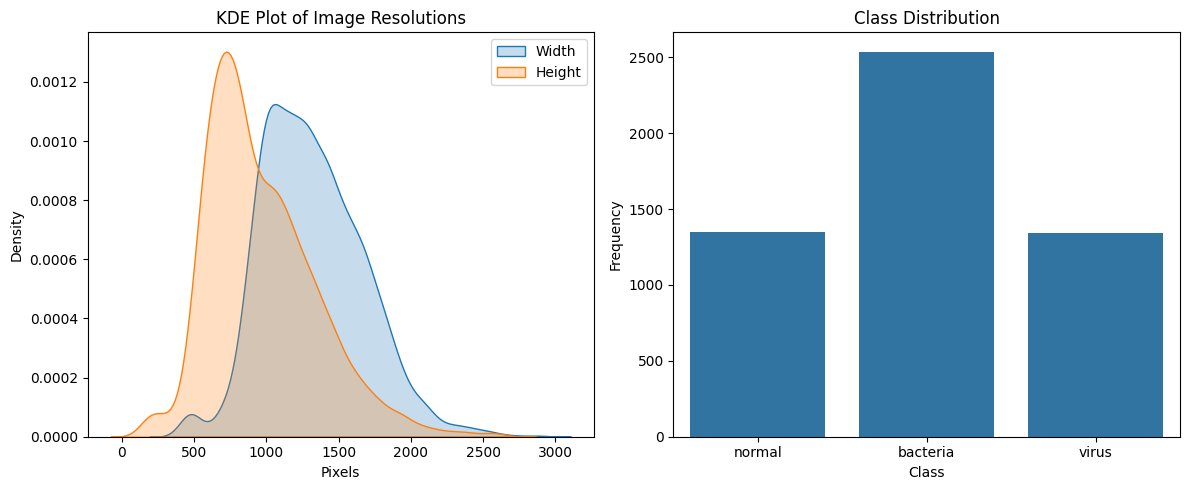

In [19]:
eda(train_dataset)